In [26]:
# importando as biliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/61a634996879d5c1384af6f567e29659ad68b727/Aula%2004/Base%20de%20Dados/data.csv",
                    sep = ",")

In [3]:
dados.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


<AxesSubplot: >

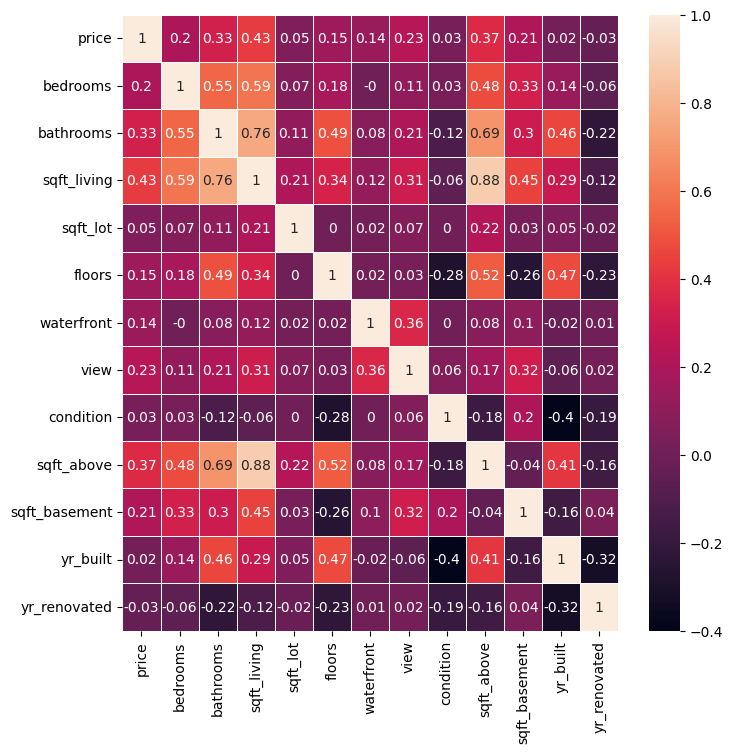

In [4]:
correlation_matrix = dados.corr(numeric_only=True).round(2)

fix, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [5]:
x = dados [["sqft_living", "bathrooms"]].values
y = dados["price"].values

<AxesSubplot: xlabel='sqft_living', ylabel='price'>

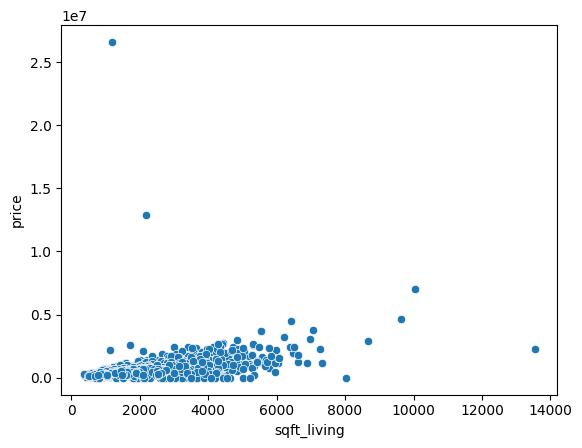

In [6]:
sns.scatterplot(data=dados, x="sqft_living", y="price")

<AxesSubplot: xlabel='bathrooms', ylabel='price'>

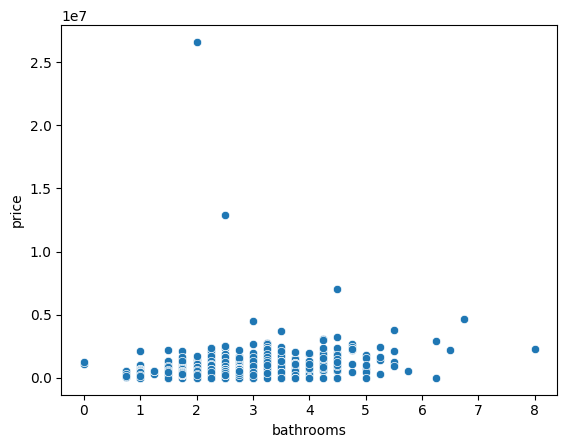

In [7]:
sns.scatterplot(data=dados, x="bathrooms", y="price")

<AxesSubplot: xlabel='bathrooms', ylabel='sqft_living'>

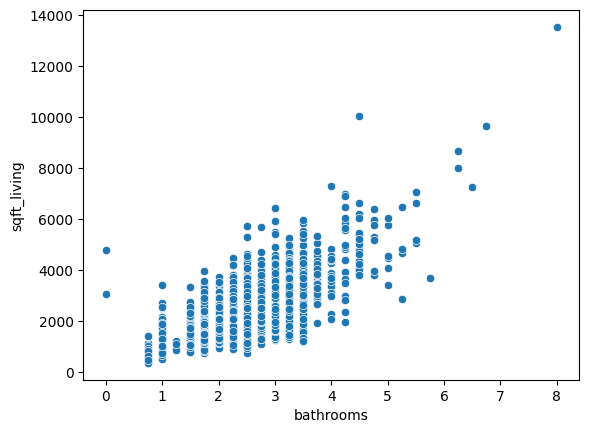

In [8]:
sns.scatterplot(data=dados, x="bathrooms", y="sqft_living")

C:\Users\gabri\AppData\Local\Temp\ipykernel_2772\4026494317.py:5: UserWarning: Legend does not support handles for ndarray instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(x,y)


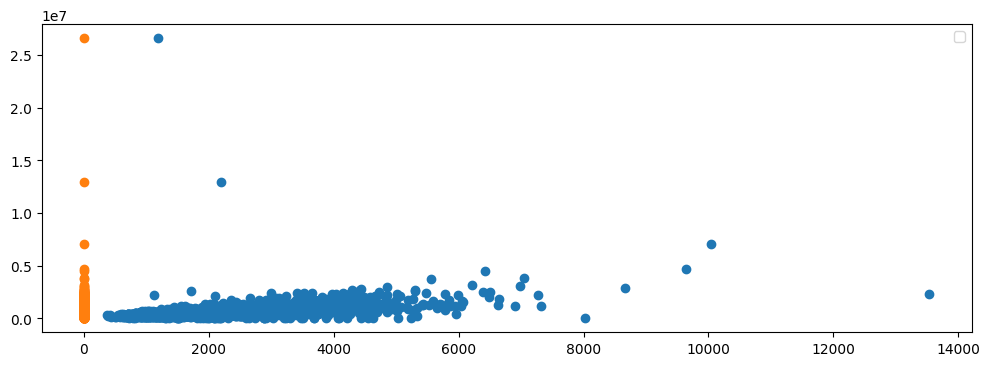

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))

ax.scatter(x[:,0], y)
ax.scatter(x[:,1], y)

<AxesSubplot: xlabel='sqft_living', ylabel='Count'>

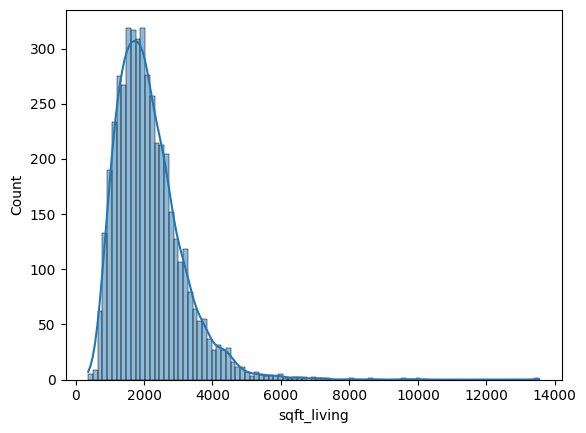

In [14]:
sns.histplot(data=dados, x="sqft_living", kde=True)

<AxesSubplot: xlabel='bathrooms', ylabel='Count'>

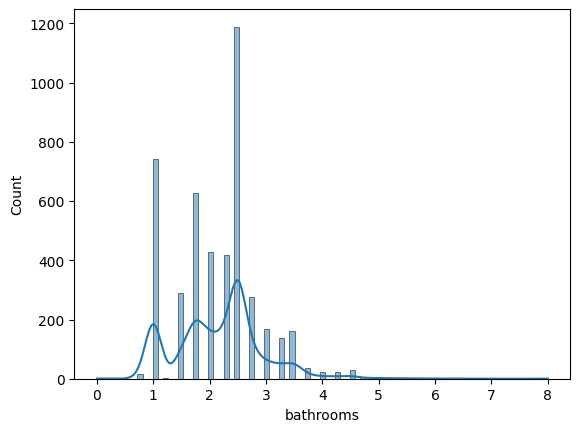

In [16]:
sns.histplot(data=dados, x="bathrooms", kde=True)

<AxesSubplot: >

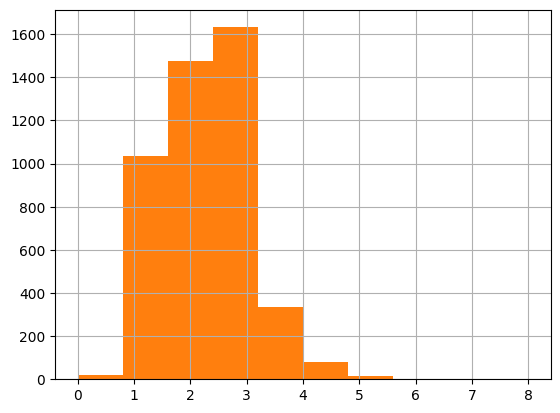

In [17]:
hist_variaveis = pd.DataFrame(dados, columns=["sqtf_living", "bathrooms"])

hist_variaveis.sqtf_living.hist()
hist_variaveis.bathrooms.hist()


In [18]:
# Padronização

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

In [ ]:
x_std

array([[-0.82997105, -0.84320364],
       [ 1.56852826,  0.43280154],
       [-0.21736733, -0.20520105],
       ...,
       [ 0.90400897,  0.43280154],
       [-0.05123751, -0.20520105],
       [-0.67422434,  0.43280154]])

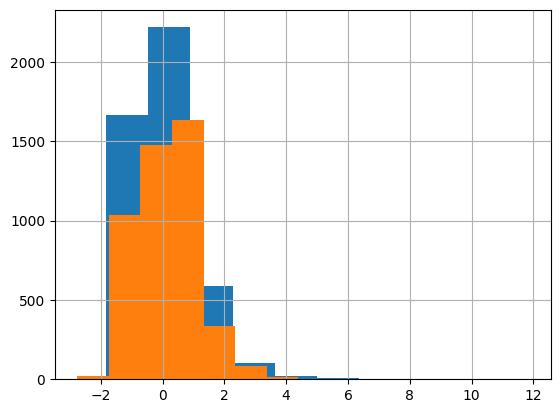

In [ ]:
x_std = pd.DataFrame(x_std, columns=["sqt_living", "bathrooms"])
x_std.sqt_living.hist()
x_std.bathrooms.hist()

<AxesSubplot: >

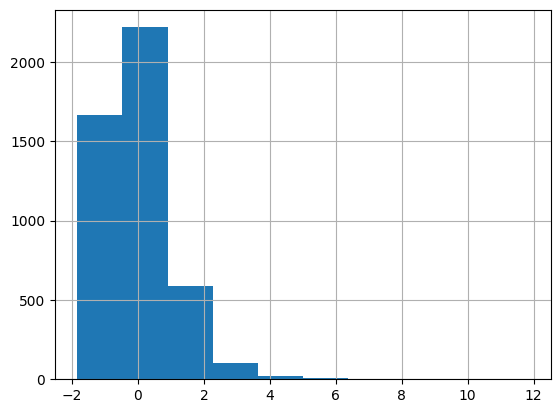

In [22]:
x_std.sqt_living.hist()

<AxesSubplot: >

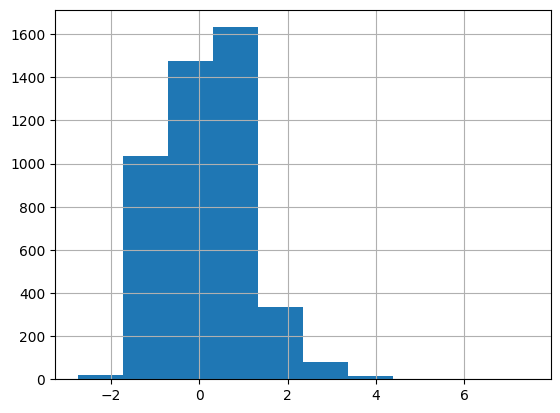

In [23]:
x_std.bathrooms.hist()

In [27]:
dados.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [28]:
x = dados[["sqft_living", "bathrooms"]].values
y = dados["price"].values

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=7)

In [30]:
len(x_train)

3450

In [31]:
len(x_test)

1150

In [32]:
scaler = MinMaxScaler()
scaler.fit(x_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [33]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [34]:
x_train_scaled

array([[0.15349544, 0.40625   ],
       [0.11960486, 0.3125    ],
       [0.17021277, 0.34375   ],
       ...,
       [0.23632219, 0.46875   ],
       [0.15197568, 0.3125    ],
       [0.10714286, 0.3125    ]])

In [35]:
model = LinearRegression()

model.fit(x_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_pred = model.predict(x_test_scaled)

In [37]:
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {MAE}")
print(f"R2: {r2}")

MAE: 173536.74188212887
R2: 0.460589559677016


In [38]:
model_normal = LinearRegression()
model_normal.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
y_pred_normal = model_normal.predict(x_test)

In [40]:
MAE = mean_absolute_error(y_test, y_pred_normal)
r2 = r2_score(y_test, y_pred_normal)

print(f"MAE: {MAE}")
print(f"R2: {r2}")

MAE: 173536.74188212887
R2: 0.460589559677016
